In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Datos proporcionados
U = np.array([300, 280, 260, 240, 220, 200])  # [V]
R = np.array([0.026, 0.04, 0.05])  # [m]
I_h3 = np.array([2.53, 2.34, 2.21, 2.09, 1.89, 1.7])  # [A] para r = 3 cm
I_h4 = np.array([1.91, 1.82, 1.67, 1.57, 1.44, 1.34])  # [A] para r = 4 cm
I_h5 = np.array([1.54, 1.49, 1.41, 1.33, 1.23, 1.12])  # [A] para r = 5 cm
k = 0.756  # [mT/A] = [10^-3 T/A]

# Convertir k a Tesla/Ampere
k_T = k * 1e-3  # [T/A]

# Calcular B para cada corriente
B3 = k_T * I_h3  # [T] para r = 3 cm
B4 = k_T * I_h4  # [T] para r = 4 cm
B5 = k_T * I_h5  # [T] para r = 5 cm

# Calcular r²B² para cada radio
r3_sq_B3_sq = (R[0]**2) * (B3**2)  # [m²·T²] para r = 3 cm
r4_sq_B4_sq = (R[1]**2) * (B4**2)  # [m²·T²] para r = 4 cm
r5_sq_B5_sq = (R[2]**2) * (B5**2)  # [m²·T²] para r = 5 cm

# Calcular 2U
U_double = 2 * U  # [V]

# Combinar todos los datos para el ajuste lineal
all_r2B2 = np.concatenate([r3_sq_B3_sq, r4_sq_B4_sq, r5_sq_B5_sq])
all_2U = np.concatenate([U_double, U_double, U_double])

# Ajuste lineal: 2U vs r²B²
slope, intercept, r_value, p_value, std_err = linregress(all_r2B2, all_2U)
# La pendiente es e/m según la ecuación (5)
e_m_exp = slope  # [C/kg]
e_m_error = std_err  # Error estándar de la pendiente

# Valor teórico de e/m
e_m_theoretical = 1.758820e11  # [C/kg]

# Calcular errores
error_abs = abs(e_m_exp - e_m_theoretical)
error_percent = (error_abs / e_m_theoretical) * 100
error_relative = error_abs / e_m_theoretical

# Calcular incertidumbre porcentual
uncertainty_percent = (e_m_error / e_m_exp) * 100
# Resultados
print("RESULTADOS DEL EXPERIMENTO")
print("=" * 60)
print(f"Pendiente del ajuste lineal: ({slope:.3e} ± {std_err:.3e}) C/kg")
print(f"Relación carga/masa experimental (e/m): ({e_m_exp:.3e} ± {e_m_error:.3e}) C/kg") 
print(f"Relación carga/masa teórica (e/m): {e_m_theoretical:.3e} C/kg")
print(f"Error absoluto: {error_abs:.3e} C/kg")
print(f"Error porcentual: {error_percent:.2f}%")
print(f"Error relativo: {error_relative:.4f}")
print(f"Incertidumbre experimental: ±{uncertainty_percent:.2f}%")
print(f"Coeficiente de correlación (R²): {r_value**2:.6f}")
print(f"Intercepto: {intercept:.3e} V (teóricamente debería ser 0)")

RESULTADOS DEL EXPERIMENTO
Pendiente del ajuste lineal: (8.502e+10 ± 1.520e+10) C/kg
Relación carga/masa experimental (e/m): (8.502e+10 ± 1.520e+10) C/kg
Relación carga/masa teórica (e/m): 1.759e+11 C/kg
Error absoluto: 9.086e+10 C/kg
Error porcentual: 51.66%
Error relativo: 0.5166
Incertidumbre experimental: ±17.88%
Coeficiente de correlación (R²): 0.661521
Intercepto: 3.052e+02 V (teóricamente debería ser 0)


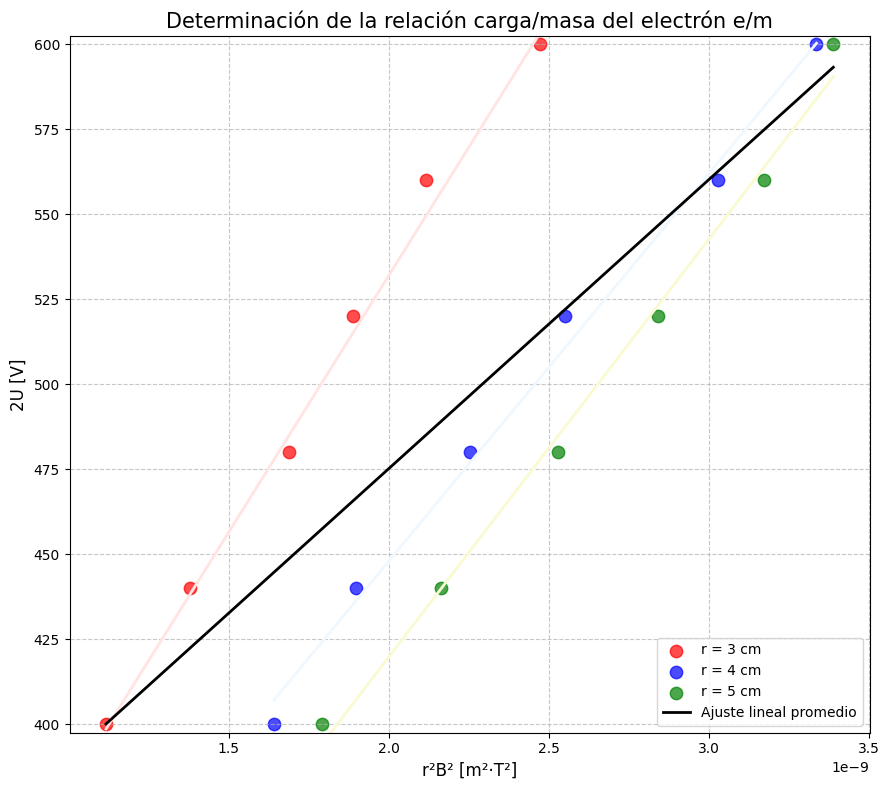

In [87]:
# Gráfico
plt.figure(figsize=(9, 8))

# Datos experimentales por radio
# Ajuste lineal
x_fit3 = np.linspace(min(r3_sq_B3_sq), max(r3_sq_B3_sq), 100)
y_fit3 = 1.51e11 * x_fit3 + 230
x_fit4 = np.linspace(min(r4_sq_B4_sq), max(r4_sq_B4_sq), 100)
y_fit4 = 1.14e11 * x_fit4 + 220
x_fit5 = np.linspace(min(r5_sq_B5_sq), max(r5_sq_B5_sq), 100)
y_fit5 = 1.229e11 * x_fit5+ 174
plt.plot(x_fit3, y_fit3, color="mistyrose", linewidth=2)
plt.plot(x_fit4, y_fit4, color="aliceblue", linewidth=2)
plt.plot(x_fit5, y_fit5, color="lightgoldenrodyellow", linewidth=2)
plt.scatter(r3_sq_B3_sq, U_double, color='red', alpha=0.7, label='r = 3 cm', s=80)
plt.scatter(r4_sq_B4_sq, U_double, color='blue', alpha=0.7, label='r = 4 cm', s=80)
plt.scatter(r5_sq_B5_sq, U_double, color='green', alpha=0.7, label='r = 5 cm', s=80)
plt.xlabel('r²B² [m²·T²]', fontsize=12)
plt.ylabel('2U [V]', fontsize=12)
plt.title('Determinación de la relación carga/masa del electrón e/m', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)

x_fit = np.linspace(min(all_r2B2), max(all_r2B2), 100)
y_fit = slope * x_fit + intercept
plt.plot(x_fit, y_fit, 'k-', linewidth=2, label=f'Ajuste lineal promedio')

plt.ylim(397.5, 602.5)
plt.legend(loc='lower right')
plt.tight_layout()